downloading dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:01, 73530330.22it/s]                               


16384it [00:00, 88024.25it/s]           


8192it [00:00, 66207.69it/s]            


for verification of file

In [ ]:
import os

In [ ]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'README.txt', 'survey_results_schema.csv']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_public.csv')

In [ ]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [ ]:
df.columns.value_counts()

NEWCollabToolsDesireNextYear    1
JobSeek                         1
JobSat                          1
CompTotal                       1
NEWOnboardGood                  1
                               ..
YearsCodePro                    1
PlatformWorkedWith              1
NEWPurchaseResearch             1
LanguageWorkedWith              1
NEWOtherComms                   1
Length: 61, dtype: int64

61 columns

In [ ]:
fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
refer = pd.read_csv(fname, index_col='Column').QuestionText

In [ ]:
refer

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

to retrive a full question from the column

In [ ]:
refer['MainBranch']

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

Data preparation and Cleaning

we taking only the required columns for the data analysis and leave the other data behind

Demographics of the survey respondents and the global programming community

Distribution of programming skills, experience, and preferences

Employment-related information, preferences, and opinions

In [ ]:
selected_columns = [
                    #Demographics
                    'Country','Age','Gender','EdLevel','UndergradMajor',
                    # Programming Exercise
                    'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
                    # Employment
                    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt'
]

In [ ]:
len(selected_columns)

20

copying data from orginal data frame to copy frame

In [ ]:
survey_df = df[selected_columns].copy()

In [ ]:
newdf = survey_df[selected_columns]

In [ ]:
survey_df.shape

(64461, 20)

In [ ]:
newdf.shape

(64461, 20)

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

most of columns data type in object and only 2 columns is integer data type, we have to eliminate the null values and other non integer or string values from the columns to convert it into a integer or float based columns. convert non numeric values to Nan and eliminate out of it.

*setting errors to coerce, converts non numeric to NaN value

*setting errors to ignore, ignores non numeric and stays in the column 

In [ ]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors = 'coerce')

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Now converted those three columns to the numeric types



In [ ]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


there is a error in max and min value of age and their corresponding columns,
so we have to drop the values that doesn't match 

In [ ]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age>90].index,inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace = True)

In [ ]:
survey_df['Gender'].value_counts()

Man                                                            45891
Woman                                                           3833
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

**simplify gender columns to one option, ie..., seperated by " ; " **

In [ ]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [ ]:
survey_df['Gender'].value_counts()

Man                                                  45891
Woman                                                 3833
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

visualize the data 

In [ ]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,6)
# matplotlib.rcParams['figure.facecolor'] = '#000000'

In [ ]:
newdf.Country

0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64461, dtype: object

In [ ]:
survey_df.Country.nunique()

172

to check which country has the highest number of respondents

In [ ]:
top_countries = survey_df.Country.value_counts().head(15)

In [ ]:
top_countries

United States         10391
India                  5372
Germany                3317
United Kingdom         3259
Canada                 1810
France                 1540
Brazil                 1439
Netherlands            1127
Poland                 1065
Australia              1018
Spain                   940
Italy                   927
Russian Federation      872
Sweden                  753
Turkey                  585
Name: Country, dtype: int64

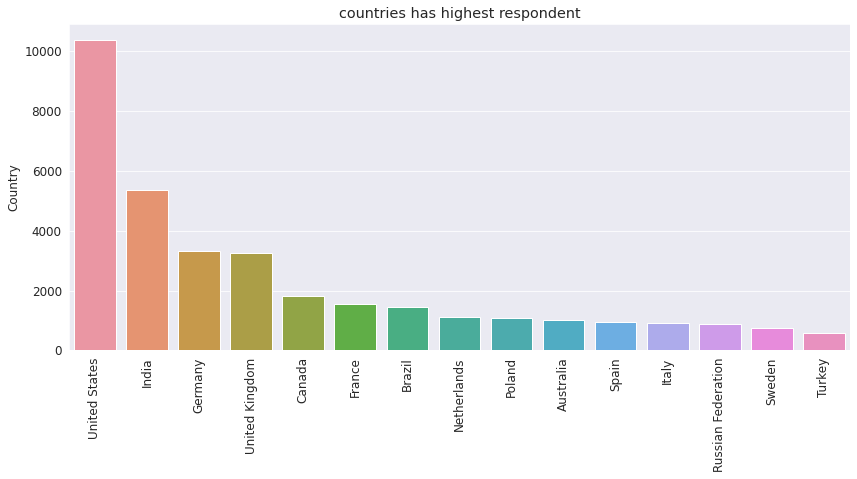

In [ ]:
plt.figure(figsize=(14,6))
plt.xticks(rotation =90)
plt.title('countries has highest respondent')
sns.barplot(x=top_countries.index,y=top_countries)

we can US has highest respondents compared to other countries

use histogram to check the distribution of age

(array([  195.,  2366.,  9032., 11818.,  8629.,  5486.,  2985.,  1737.,
         1027.,   609.,   327.,   140.,    73.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

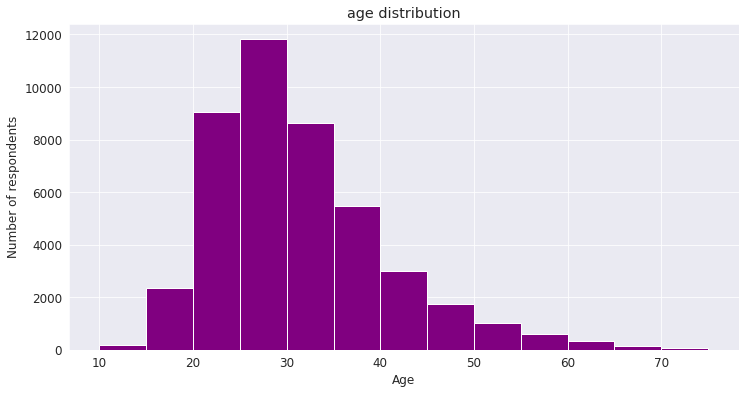

In [ ]:
plt.figure(figsize=(12,6))
plt.title('age distribution')
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age,bins=np.arange(10,80,5),color='purple')

we can see the most of them are between the 20 to 40 years old people

using pie chart for checking distribution of gender

In [ ]:
gender = survey_df['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x7f10f5b9cc10>,
 [Text(1.0618100743959473, -0.28733145652934133, 'Man'),
  Text(-1.054624335556226, 0.31267796668871506, 'Woman'),
  Text(-1.0996845102103354, 0.026343462252610098, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791691314886985, -0.15672624901600435, '91.59%'),
  Text(-0.5752496375761231, 0.17055161819384454, '7.65%'),
  Text(-0.5998279146601829, 0.014369161228696414, '0.76%')])

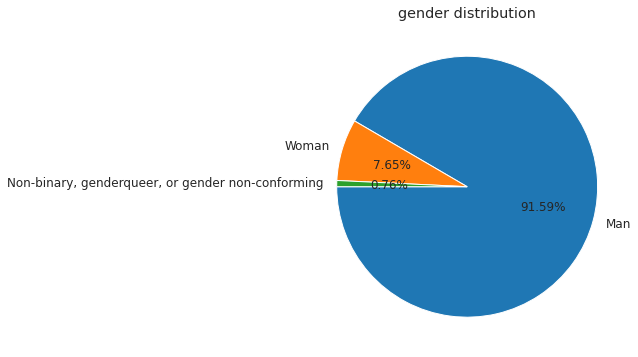

In [ ]:
plt.figure(figsize=(12,6))
plt.title('gender distribution')
plt.pie(gender,labels = gender.index,autopct ='%1.2f%%', startangle=180)

only 8 % of people, other than the mens, so distribution is skewed

Text(0.5, 1.0, 'Education level of the respondents')

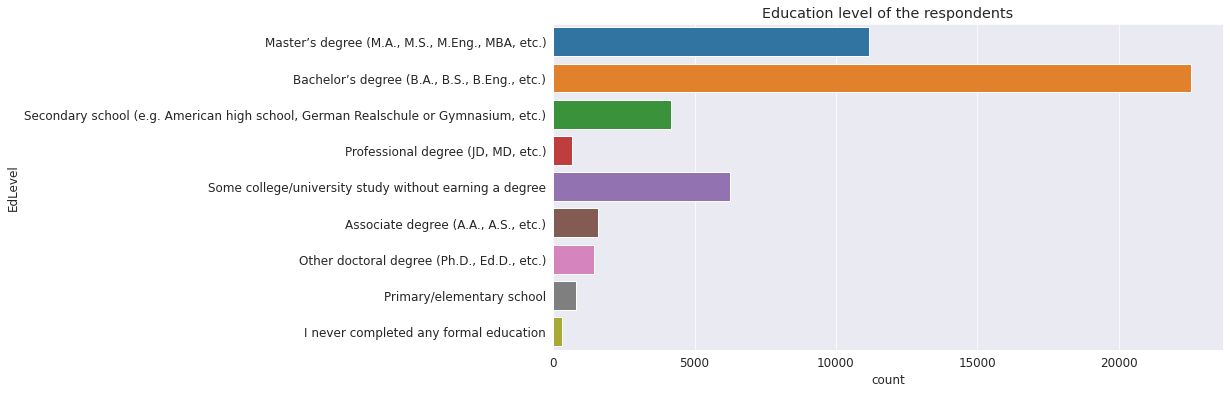

In [ ]:
a = sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 0)
plt.title('Education level of the respondents')

we can see the most of the respondents has the formal bachelor degree and followed by Master degree

Text(0.5, 0, 'Percentage')

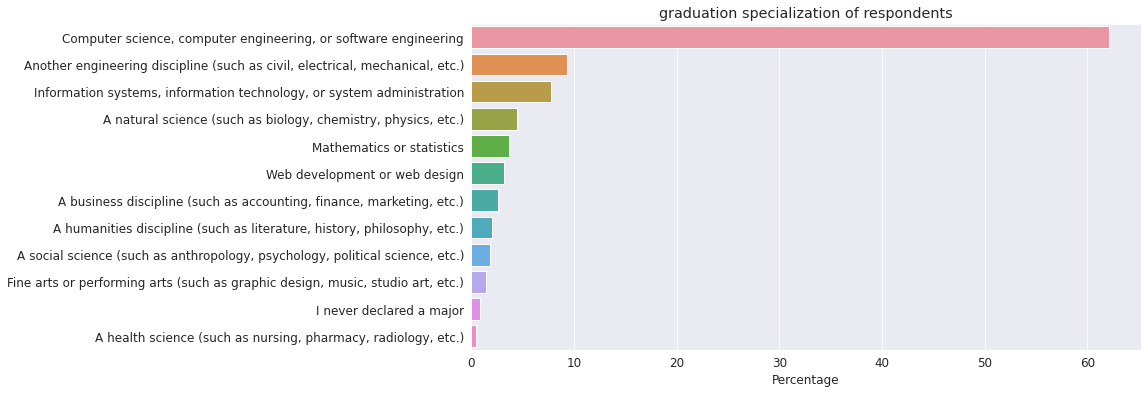

In [ ]:
grad_percent = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()
sns.barplot(x = grad_percent, y = grad_percent.index)
plt.title('graduation specialization of respondents')
plt.xlabel('Percentage')

It seems most of the respondents from the computer science background, so background from computer science will be helpful to become the developer and to work on the related fields

we have to analyze the worknature of the most of the developers, what they will prefer mostly?

Text(0.5, 0, 'percentage')

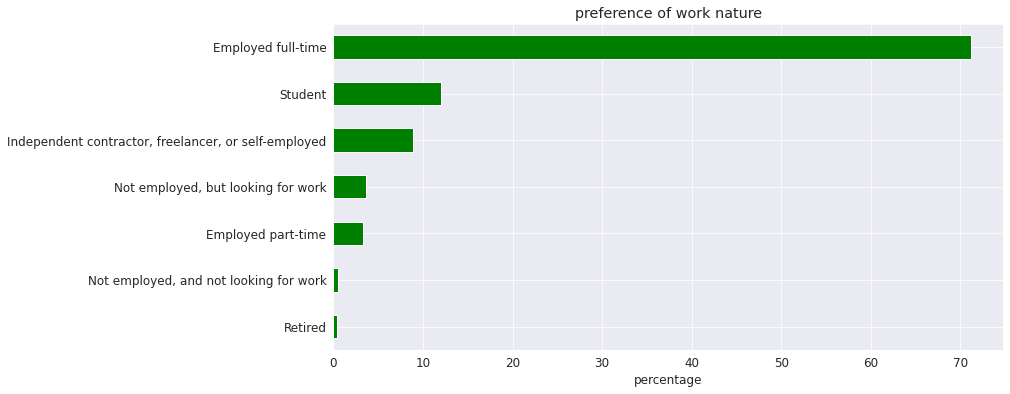

In [ ]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='g')
plt.title('preference of work nature')
plt.xlabel('percentage')

most of them are working as full time professionals

nearly 10 % of the employees are freelancers

In [ ]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                               3778
Developer, back-end                                                                                                                                                                                 2612
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                      1992
Developer, back-end;Developer, full-stack                                                                                                                                                           1307
Developer, front-end                                                                                                                                                                                

there are many branches inside Developer types seperated by the " ; " 

we have to seperate the column and then assign boolean value,

In [ ]:
def split_column(col_series):
  result_df = col_series.to_frame()
  options = []
  for index,value in col_series[col_series.notnull()].iteritems():
    for option in value.split(';'):
      if not option in result_df.columns:
        options.append(option)
        result_df[option] = False
      result_df.at[index,option] = True
  return result_df[options]

In [ ]:
dev_df = split_column(survey_df.DevType)

In [ ]:
dev_df

,"Developer, desktop or enterprise applications","Developer, full-stack",Designer,"Developer, front-end","Developer, mobile","Developer, back-end","Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Developer, QA or test",DevOps specialist,"Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dev_type_totals = dev_df.sum().sort_values(ascending = False)

In [ ]:
a = (dev_type_totals*100/dev_type_totals.sum())
print(a)

Developer, back-end                              17.459817
Developer, full-stack                            17.429020
Developer, front-end                             11.664809
Developer, desktop or enterprise applications     7.550449
Developer, mobile                                 5.973925
DevOps specialist                                 3.886314
Database administrator                            3.661935
System administrator                              3.384760
Designer                                          3.305567
Developer, embedded applications or devices       2.963865
Developer, QA or test                             2.508506
Data or business analyst                          2.485775
Data scientist or machine learning specialist     2.476242
Engineer, data                                    2.344987
Academic researcher                               2.185135
Educator                                          1.863231
Developer, game or graphics                       1.7715

Text(0.5, 0, 'Percentage')

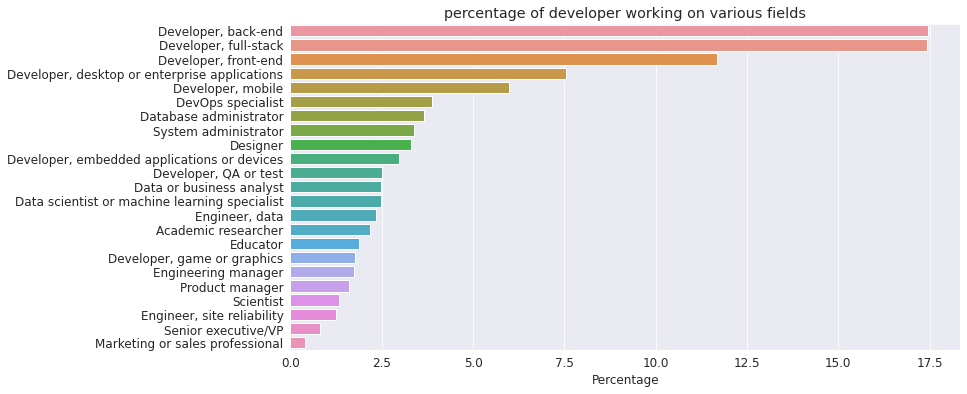

In [ ]:
dev_percent = (dev_type_totals*100/dev_type_totals.sum())
sns.barplot(x = dev_percent, y = dev_percent.index)
plt.title('percentage of developer working on various fields')
plt.xlabel('Percentage')

In [ ]:
print("percentage of people working as data scientist",round(a['Data scientist or machine learning specialist'],2),"%")

percentage of people working as data scientist 2.48 %


In [159]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [160]:
dev_df.columns

Index(['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Designer', 'Developer, front-end',
       'Developer, mobile', 'Developer, back-end',
       'Developer, game or graphics', 'Database administrator',
       'Developer, embedded applications or devices', 'Developer, QA or test',
       'DevOps specialist', 'Engineer, data', 'Educator',
       'System administrator', 'Engineering manager', 'Product manager',
       'Data or business analyst', 'Academic researcher',
       'Data scientist or machine learning specialist', 'Scientist',
       'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional'],
      dtype='object')